In [50]:
import numpy as np
import librosa
import librosa.display
from IPython.display import Audio
import cv2
import matplotlib.pyplot as plt

In [237]:
# Load the spectrogram image using OpenCV
n_fft = 512
hop_length = 16
sr=10000

def reconstruct_audio(image):
    spec_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    
    # Convert the spectrogram image to a numpy array
    spec_array = np.array(spec_image)
        
    # Denormalise Spectrogram
    spec_array = cv2.normalize(spec_array, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX) #Produces cleaner audio although a lot of frequency content is lost

    # Convert the spectrogram array to a magnitude spectrogram
    spec = librosa.db_to_amplitude(spec_array) 
        
    # Reconstruct the audio signal from the magnitude spectrogram
    y_reconstructed = librosa.feature.inverse.mel_to_audio(spec, sr=sr, n_fft=n_fft, n_iter=1, fmax=sr, hop_length=hop_length)
    
    #return y_reconstructed
    # Save the reconstructed audio signal as a WAV file
    return Audio(y_reconstructed, rate=sr)


In [230]:
reconstruct_audio('recon.png')

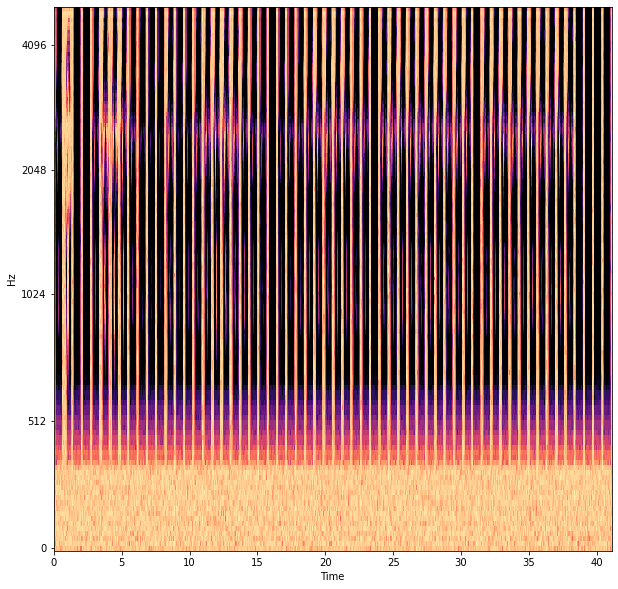

In [185]:

audio_file = "yes.wav"
y, sr = librosa.load(audio_file, sr=sr, mono=True)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                           hop_length=hop_length) 
plt.figure(figsize=(10,10))
#plt.axis("off")
S_dB = librosa.power_to_db(S, ref=np.max) 
librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length,
                                 x_axis='time', y_axis='mel', n_fft=n_fft)


In [252]:
from PIL import Image
import glob

# Set the path to the folder containing the images
image_folder = './reconstructed_images/'
# Set the name of the output GIF file
output_file = "./reconstructed_images"

# Get a list of all the image file names in the folder
image_files = glob.glob(image_folder + '*.png')
# Sort the file names alphabetically to ensure they are in the correct order
image_files.sort()
# Open each image and add it to a list
def create_final_audio(folder):
        audio = np.array([])
        for filename in image_files:
                spec_image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
                
                x, y, w, h = 10, 10, 272, 272
    
                spec_image = spec_image[y:y+h, x:x+w]
            
    
                spec_array = np.array(spec_image)
        

                spec = librosa.db_to_amplitude(spec_array) 
        
                y_reconstructed = librosa.feature.inverse.mel_to_audio(spec, sr=sr, n_fft=n_fft, n_iter=1, fmax=sr, hop_length=hop_length)
                wavefile.write(output_file, sr, y_reconstructed)
                #audio = np.append(audio, y_reconstructed)
        #return audio

        


In [253]:
final_array = create_final_audio(image_files)

PermissionError: [Errno 13] Permission denied: './reconstructed_images'

In [244]:
Audio(final_array, rate=sr)

In [ ]:
from pydub import AudioSegment

# Set the length of the window in milliseconds
window_length = 100

# Load the first audio file and apply a Hann window to the beginning
audio = AudioSegment.from_file("file1.wav")
window = AudioSegment.silent(duration=window_length)
audio = window.overlay(audio[:window_length].fade_out(window_length), position=0)

# Iterate over the remaining audio files, apply a window to the beginning, and concatenate
for i in range(2, num_files+1):
    file_name = f'file{i}.wav'
    audio_i = AudioSegment.from_file(file_name)
    window_i = AudioSegment.silent(duration=window_length)
    audio_i = window_i.overlay(audio_i[:window_length].fade_out(window_length), position=0)
    audio += audio_i

# Save the concatenated audio file
audio.export("output.wav", format="wav")

In [245]:
import scipy.io.wavfile as wavefile